# Inductive Miner (Infrequent) Prototyping

### Inductive Miner - Base

In [188]:
%reload_ext autoreload
%autoreload 2

from practical.ProcessMining.group1.task3.inductiveminer import InductiveMiner
from practical.ProcessMining.group1.task3.inductiveminer_infrequent import InductiveMinerInfrequent
from practical.ProcessMining.group1.shared.utils import read_txt_test_logs
import pandas as pd
from IPython.display import Image, display
from pm4py.visualization.process_tree import visualizer as pt_vis
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import tempfile

def visualize_pm4py_process_tree(log):
    data = [{'case:concept:name': idx, 'concept:name': activity, 'time:timestamp': idx}
            for idx, trace in enumerate(log)
            for activity in trace]
    df = pd.DataFrame(data)
    event_log = log_converter.apply(df)
    process_tree = inductive_miner.apply(event_log, variant=inductive_miner.Variants.IM)
    gviz_tree = pt_vis.apply(process_tree)
    
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_file:
        pt_vis.save(gviz_tree, temp_file.name)
        display(Image(filename=temp_file.name))
    

def visualize_custom_miner(miner):
    miner.run()
    print(miner)
    display(miner.visualize_process_tree())
    miner.build_and_visualize_petrinet()

def run(log):
    miner = InductiveMiner(log)
    # PM4Py visualization
    visualize_pm4py_process_tree(log)
    
    # Custom implementation visualization
    visualize_custom_miner(miner)

def run_infrequent(log, treshhold=0.3):
    miner = InductiveMinerInfrequent(log, treshhold)
    visualize_custom_miner(miner)
  
def run_debug(log):
    visualize_custom_miner(InductiveMiner(log))

Sequence Logs

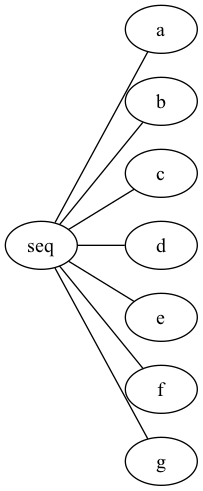

→(a, b, c, d, e, f, g)


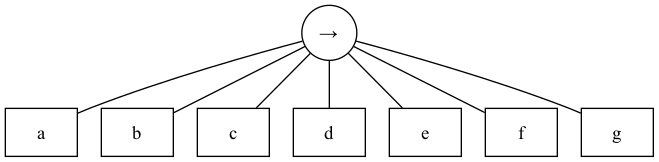

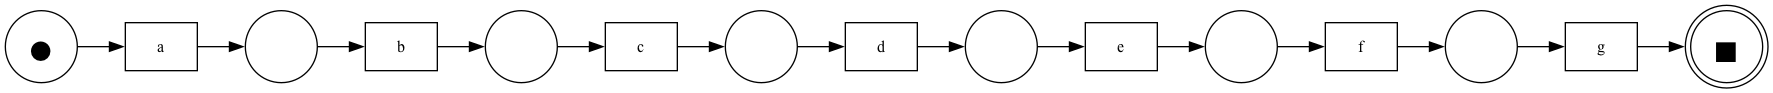

In [171]:
log = [('a', 'b', 'c', 'd', 'e', 'f', 'g')]
run(log)

XOR Logs

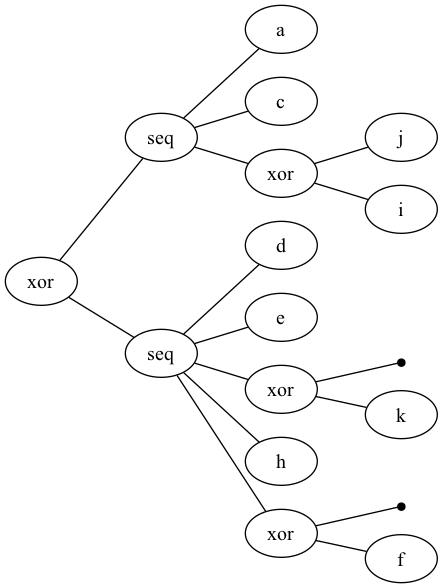

×(→(a, c, ×(i, j)), →(d, e, ×(k, 𝜏), h, ×(f, 𝜏)))


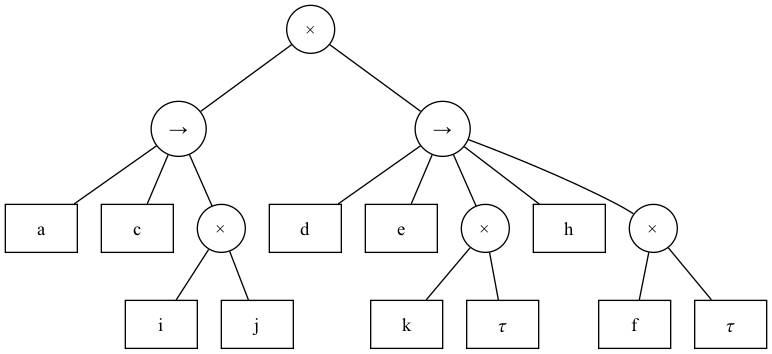

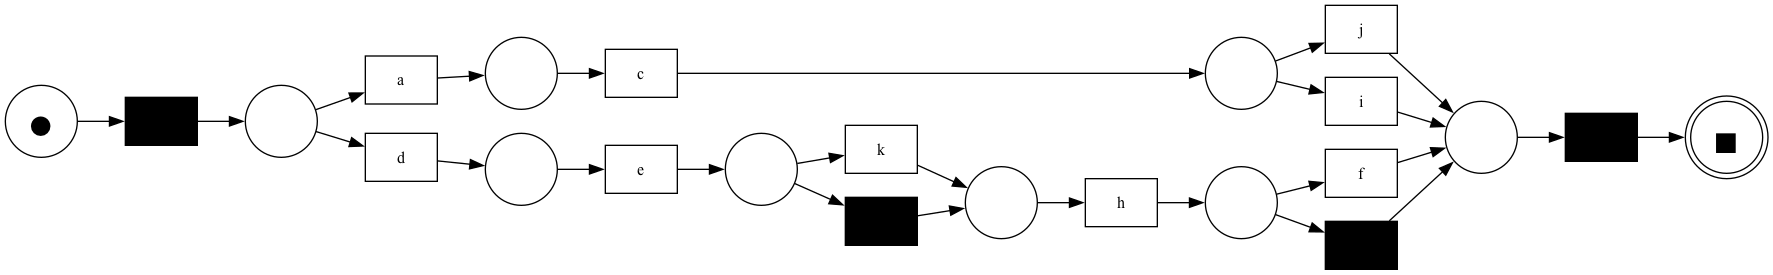

In [172]:
log = [('a', 'c', 'i'), ('d', 'e', 'k' ,'h'), ('a', 'c', 'j'), ('d', 'e', 'h', 'f')]
run(log)

Mixed Logs

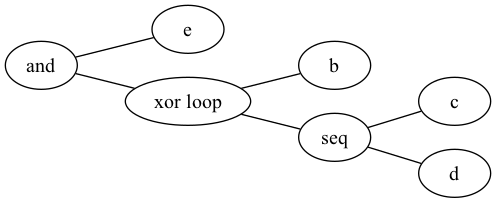

∧(↺(b, →(c, d)), e)


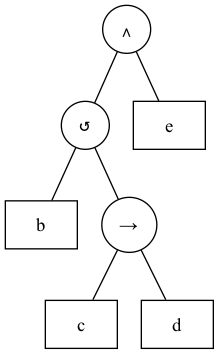

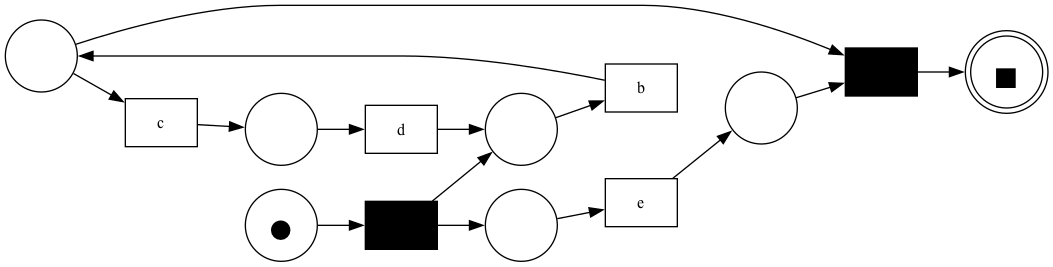

In [173]:
## Parallel Log
log = [('b', 'e'),
       ('b', 'e', 'c', 'd', 'b'),
       ('b', 'c', 'e', 'd', 'b'),
       ('b', 'c', 'd', 'e', 'b'),
       ('e', 'b', 'c', 'd', 'b')]
run(log)

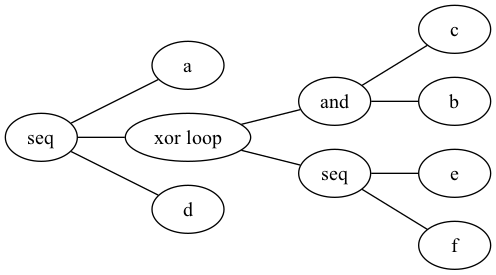

→(a, ↺(∧(b, c), →(e, f)), d)


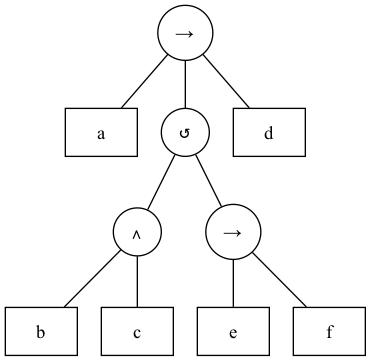

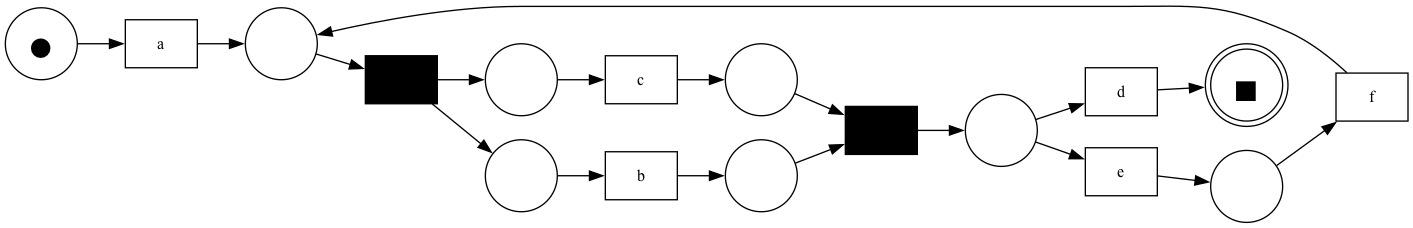

In [174]:
log = [('a', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'c', 'b', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b', 'd')]
run(log)

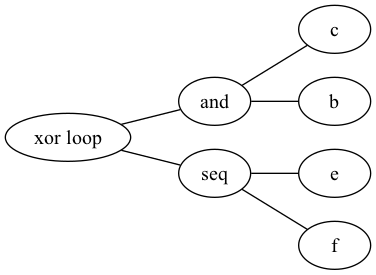

↺(∧(b, c), →(e, f))


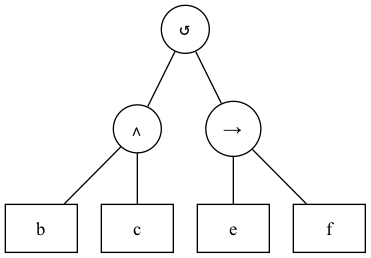

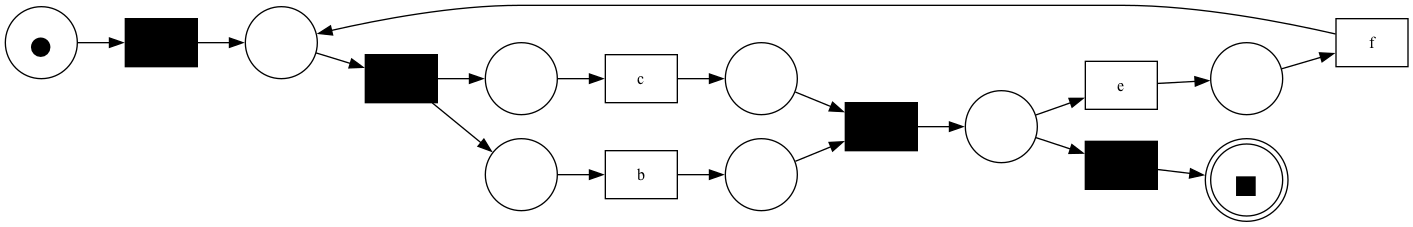

In [175]:
log = [('b', 'c'),
 ('c', 'b'),
 ('b', 'c', 'e', 'f', 'b', 'c'),
 ('c', 'b', 'e', 'f', 'b', 'c'),
 ('b', 'c', 'e', 'f', 'c', 'b'),
 ('c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b')]
run(log)

Tau Logs

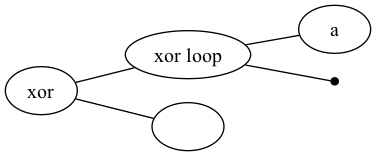

↺(𝜏, a)


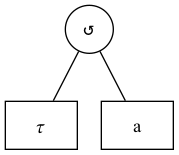

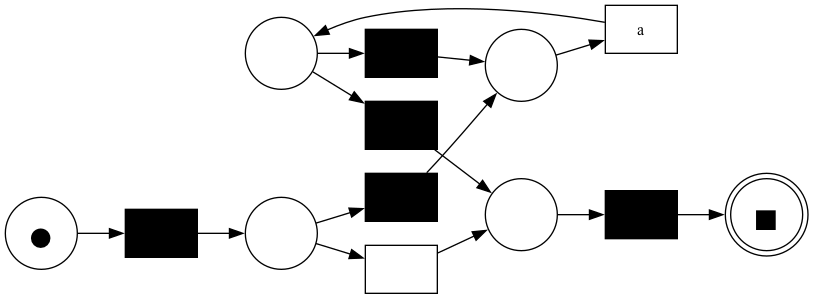

In [176]:
log = [('',), ('a',), ('a', 'a')]
run(log)

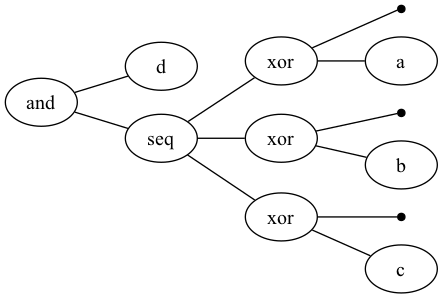

↺(𝜏, a, b, c, d)


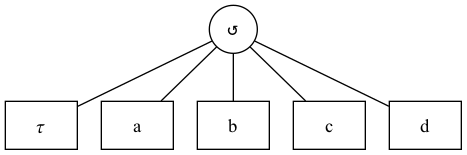

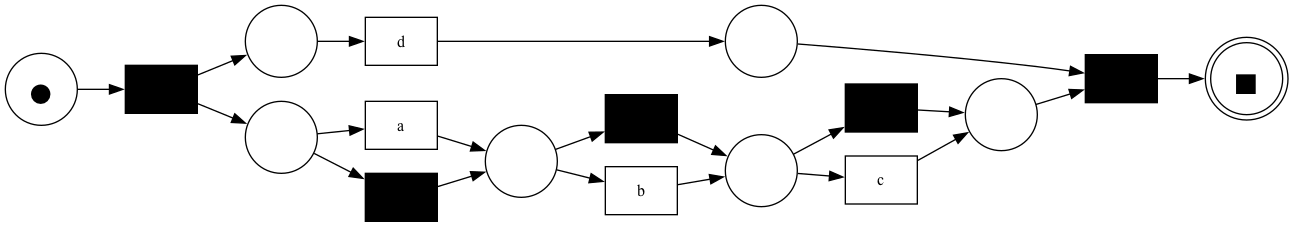

In [177]:
log = [('a', 'b', 'c', 'd'), ('d', 'a', 'b'), ('a', 'd', 'c'), ('b', 'c', 'd',)]
run(log)

In [178]:
log = [('a', 'c', 'd', 'e', 'b'),
       ('a', 'b', 'a', 'e', 'd', 'c'),
       ('a', 'e', 'c', 'b', 'd'),
       ('a', 'd', 'b', 'c', 'e')]

#run_freq(log, 0.3)
miner = InductiveMinerInfrequent(log, 0.3)
miner.run()
print(miner)

↺(𝜏, a, b, c, d, e)


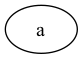

a


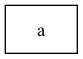

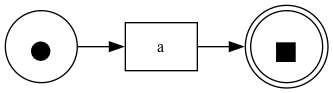

In [179]:
run([('a',), ('a',), ('a',)])

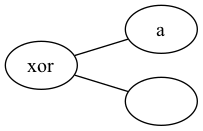

×(a, 𝜏)


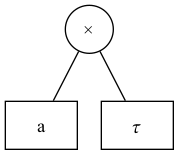

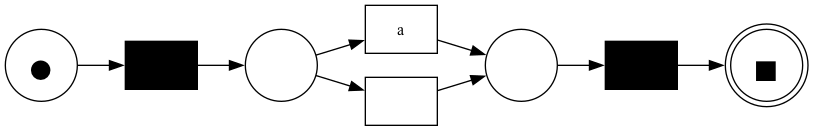

In [180]:
run([('',), ('a',), ('a',)])

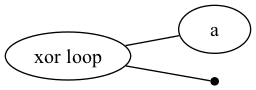

↺(a, 𝜏)


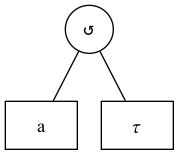

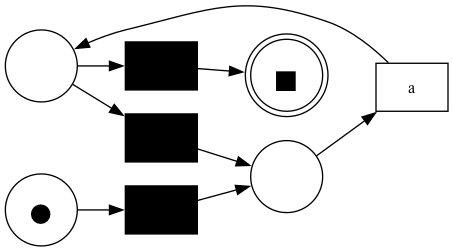

In [181]:
run([('a',), ('a', 'a'), ('a', 'a', 'a')])

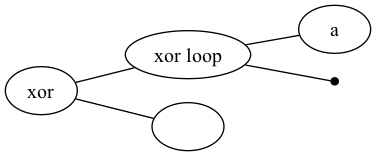

↺(𝜏, a)


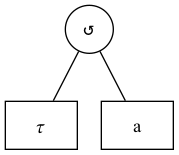

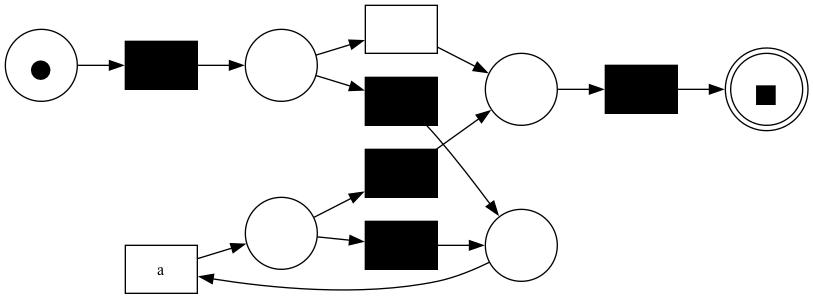

In [182]:
run([('',), ('a',), ('a', 'a')])

# Test with simple event logs

### Inductive Miner - Comparison base vs infrequent

L1


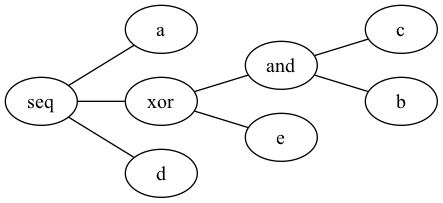

→(a, ×(∧(b, c), e), d)


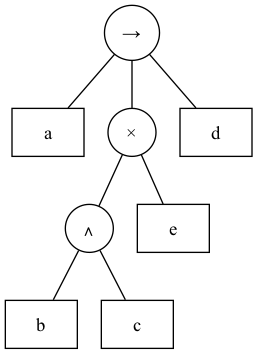

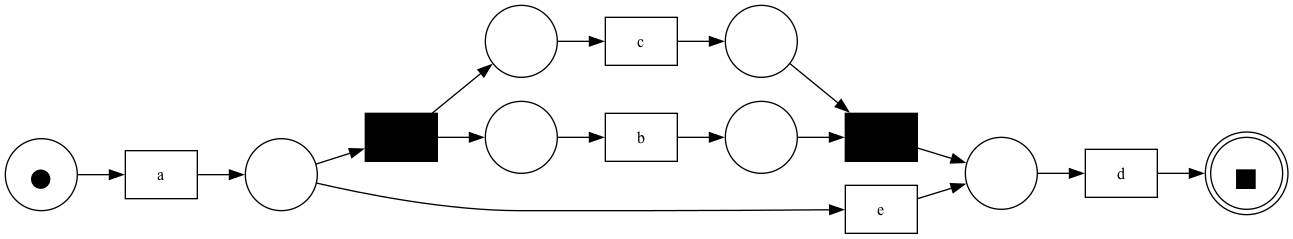

→(a, ×(∧(b, c), e), d)


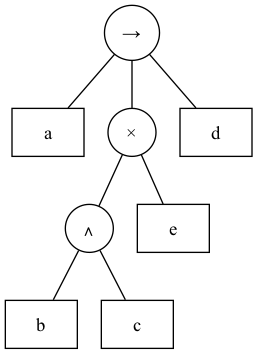

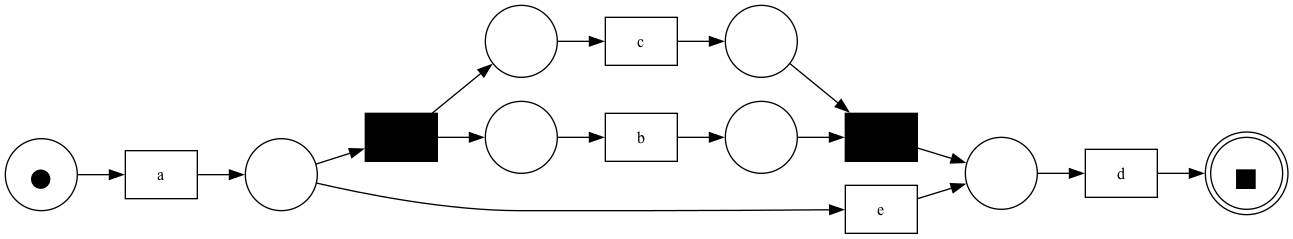

L2


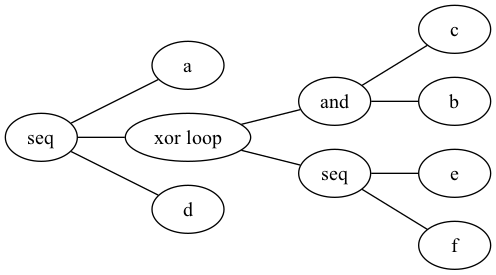

→(a, ↺(∧(b, c), →(e, f)), d)


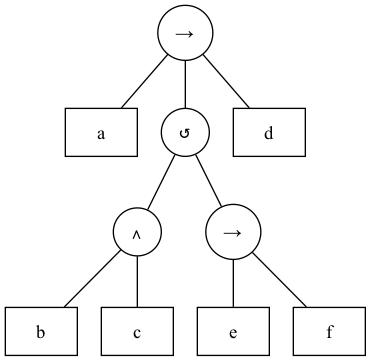

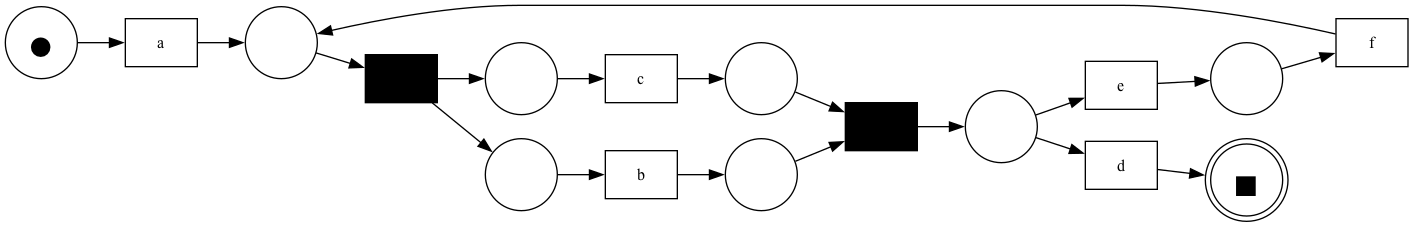

→(a, ↺(∧(b, c), →(e, f)), d)


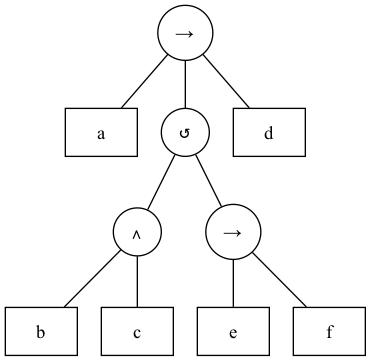

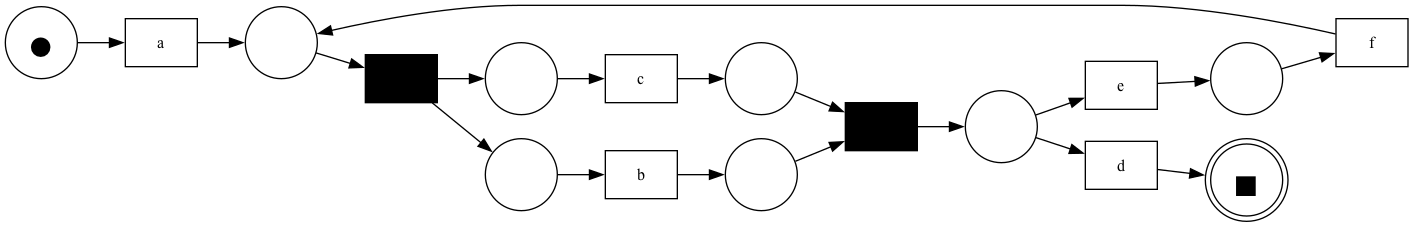

L3


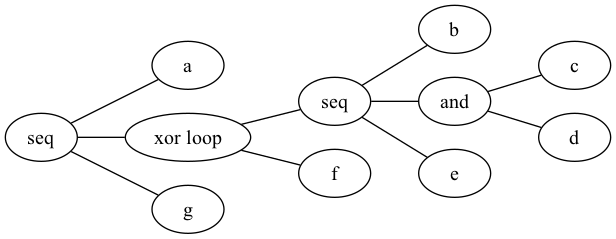

→(a, ↺(→(b, ∧(c, d), e), f), g)


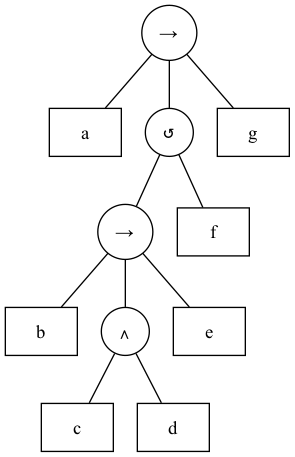

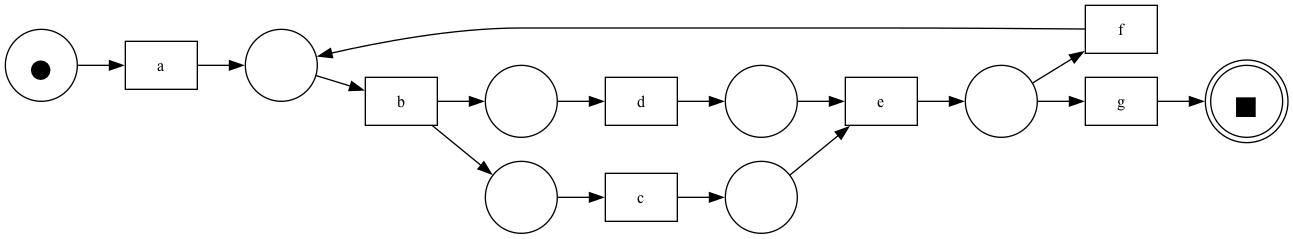

→(a, ↺(→(b, ∧(c, d), e), f), g)


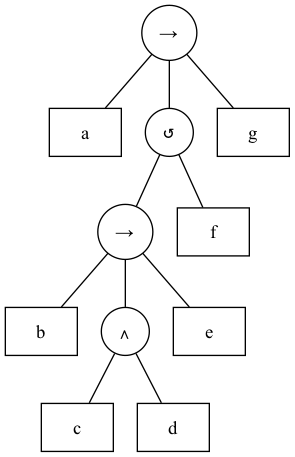

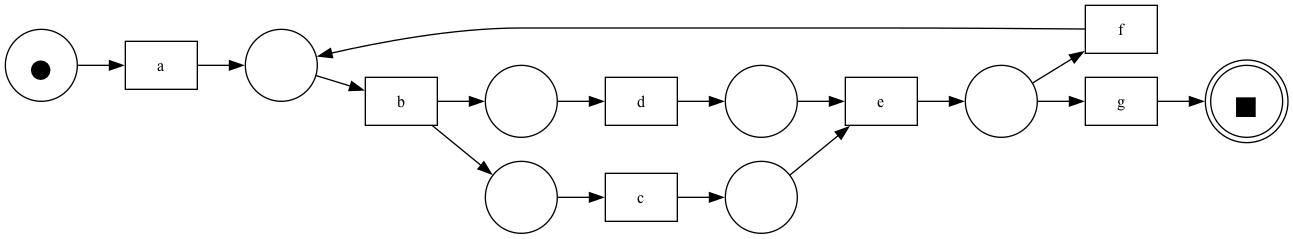

L4


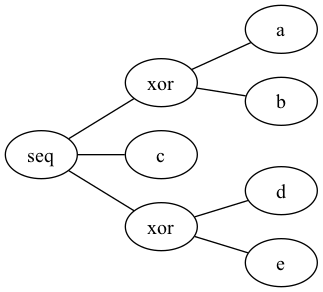

→(×(a, b), c, ×(d, e))


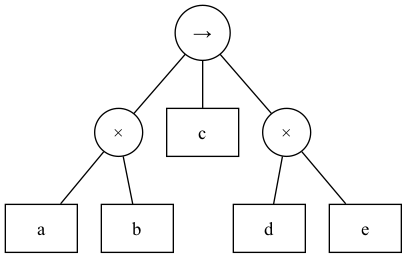

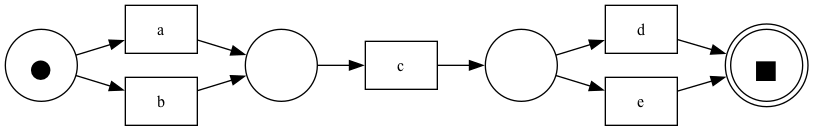

→(×(a, b), c, ×(d, e))


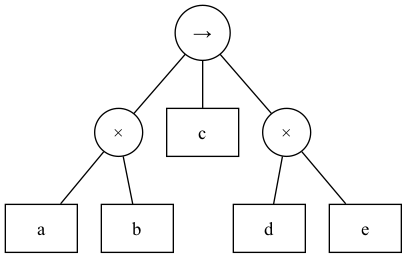

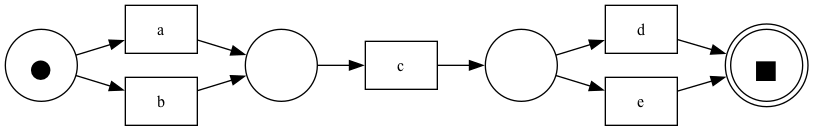

L5


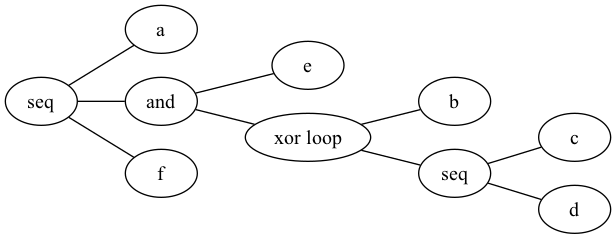

→(a, ∧(↺(b, →(c, d)), e), f)


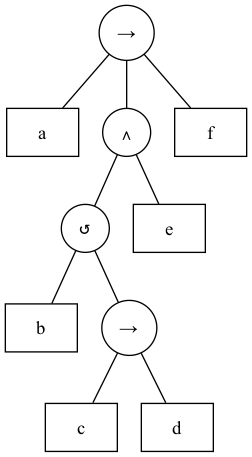

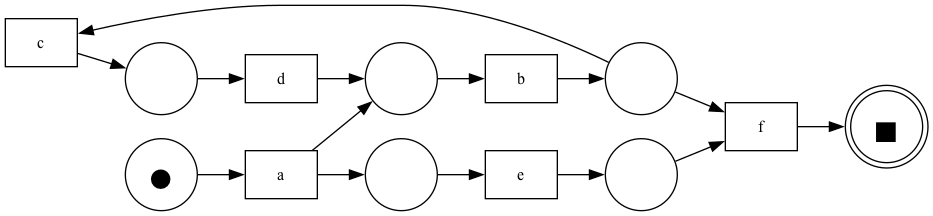

→(a, ∧(↺(b, →(c, d)), e), f)


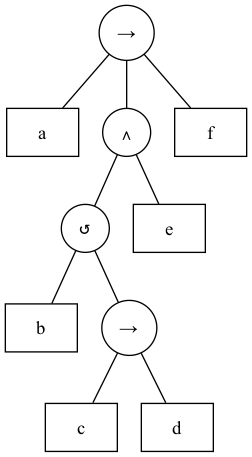

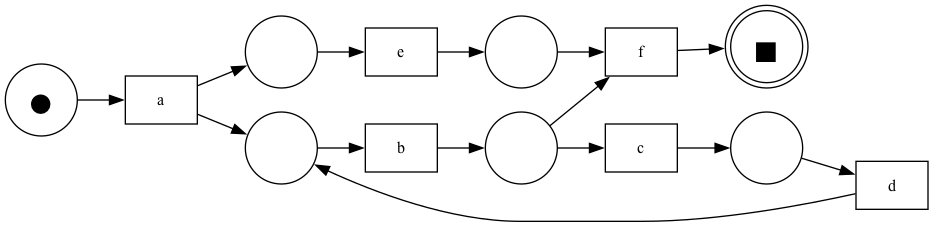

L6


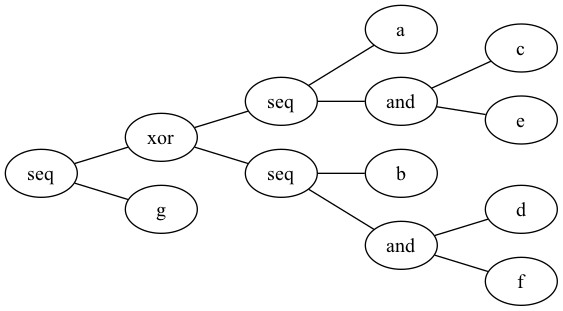

→(×(→(a, ∧(c, e)), →(b, ∧(d, f))), g)


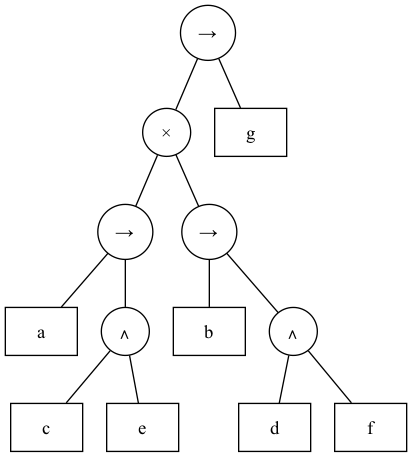

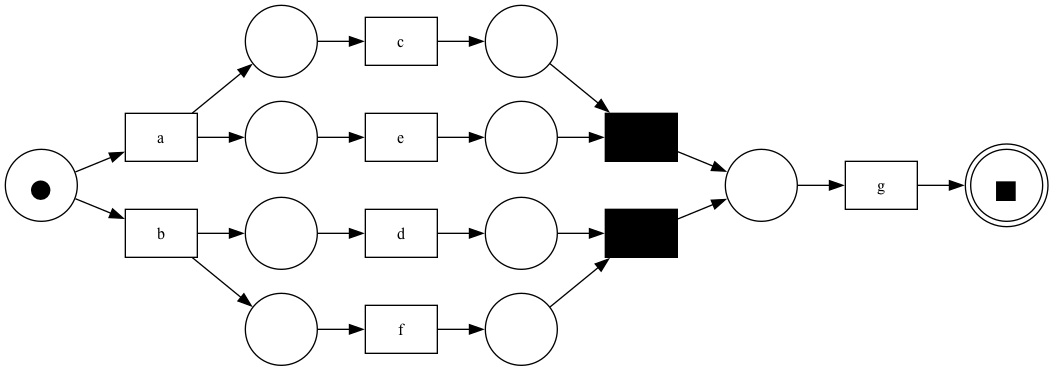

→(×(→(a, ∧(c, e)), →(b, ∧(d, f))), g)


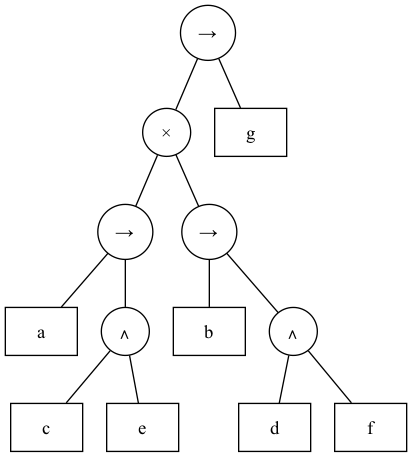

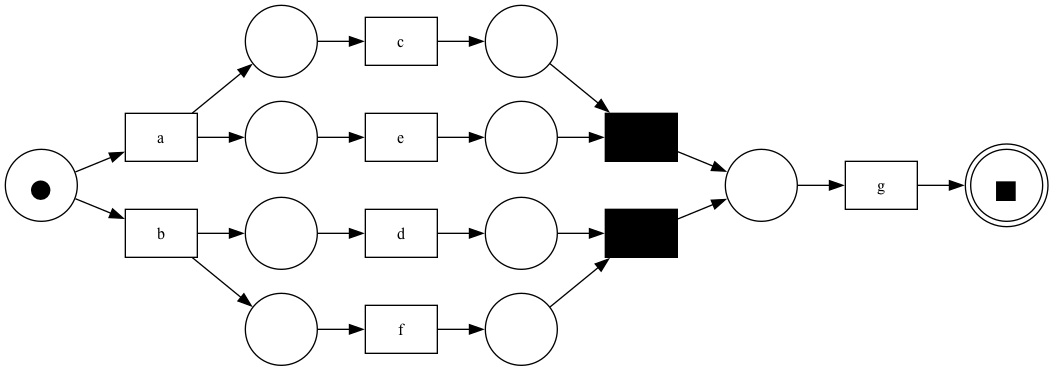

L7


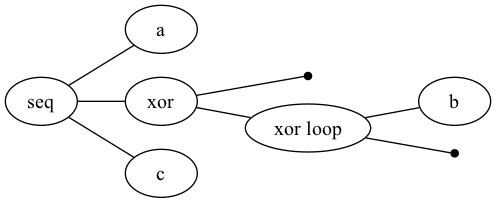

→(a, ↺(𝜏, b), c)


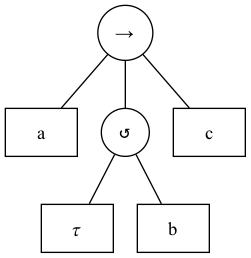

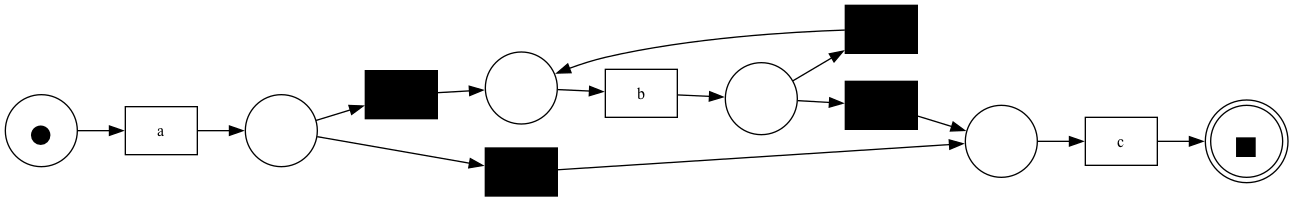

→(a, ↺(𝜏, b), c)


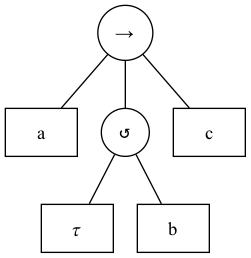

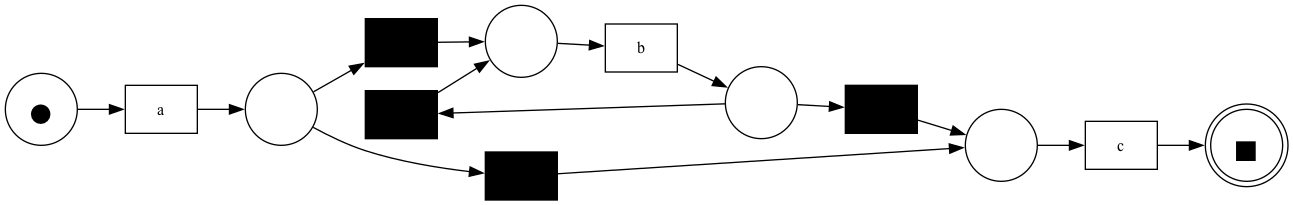

L8


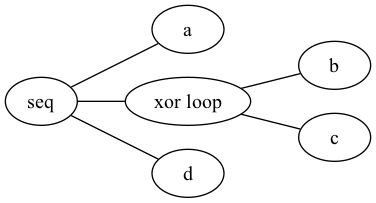

→(a, ↺(b, c), d)


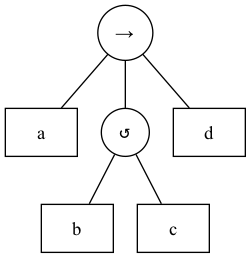

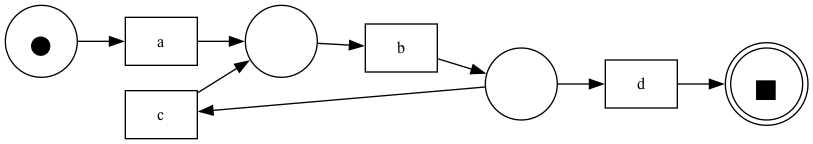

→(a, ↺(b, c), d)


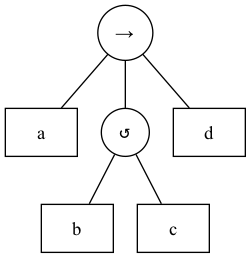

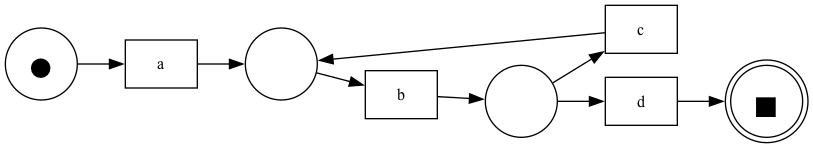

L9


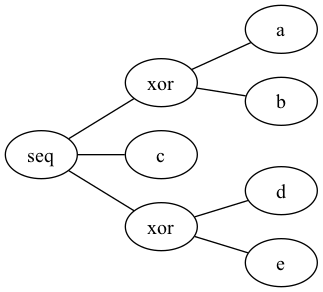

→(×(a, b), c, ×(d, e))


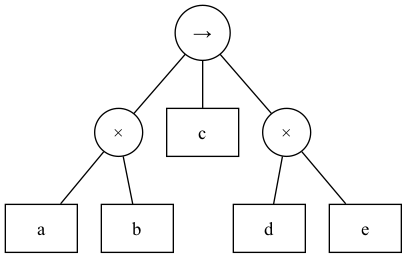

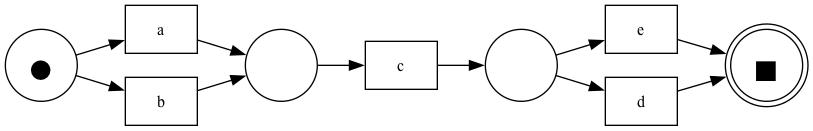

→(×(a, b), c, ×(d, e))


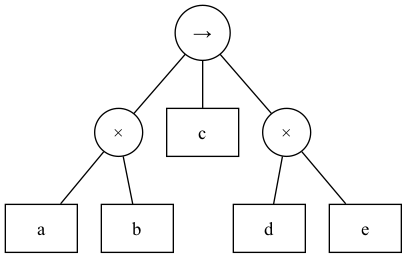

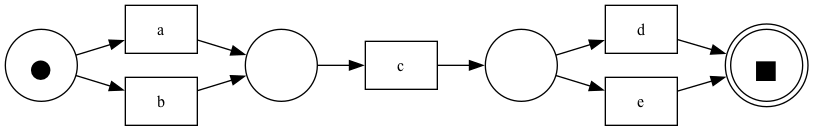

L10


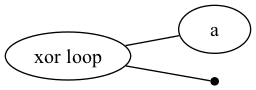

↺(a, 𝜏)


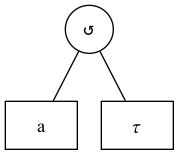

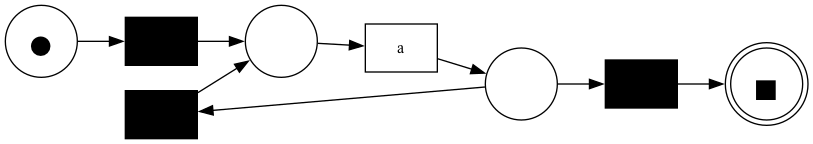

↺(a, 𝜏)


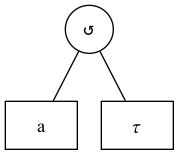

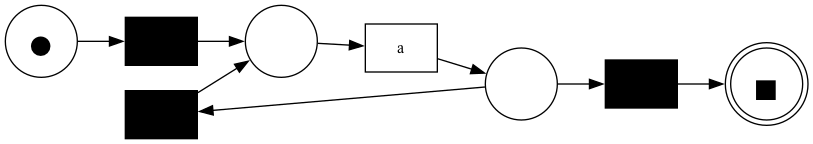

L11


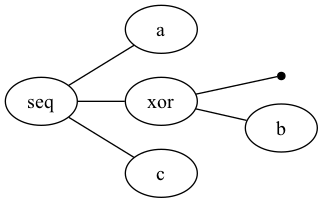

→(a, ×(b, 𝜏), c)


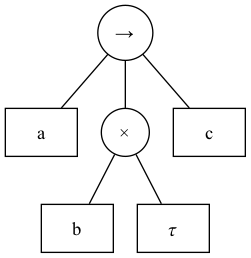

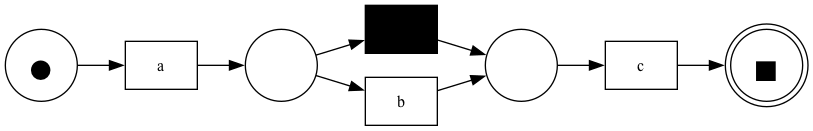

→(a, ×(b, 𝜏), c)


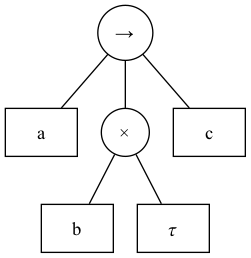

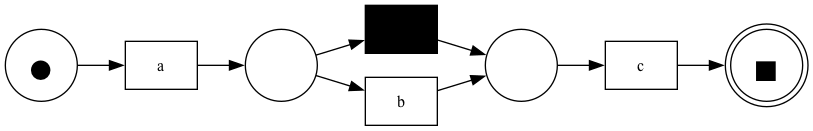

L12


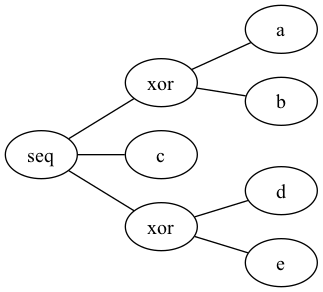

→(×(a, b), c, ×(d, e))


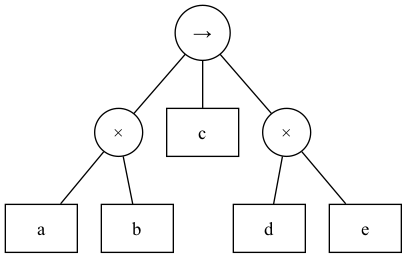

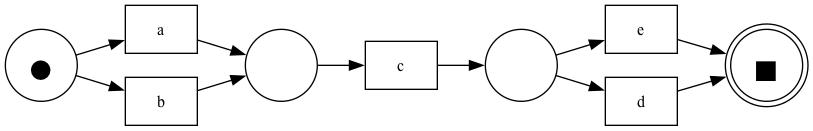

→(×(a, b), c, ×(d, e))


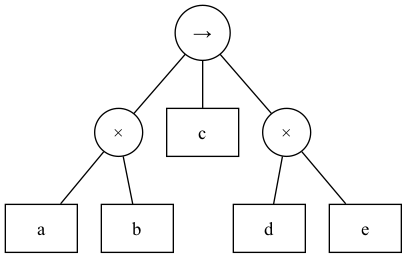

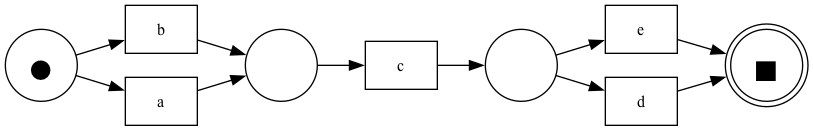

L13


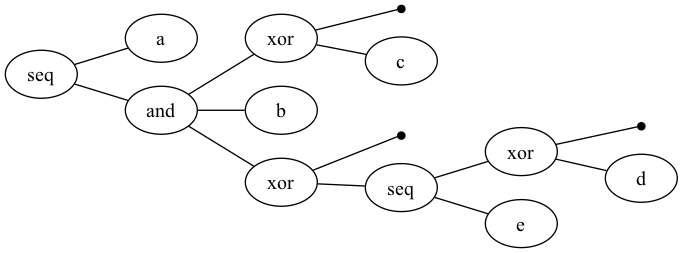

→(a, ∧(b, ↺(𝜏, c, d, e)))


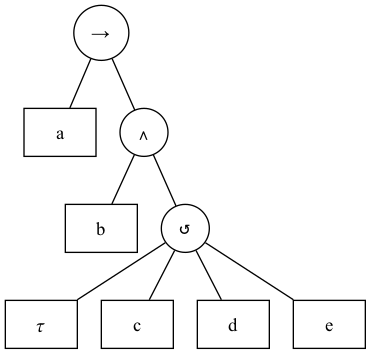

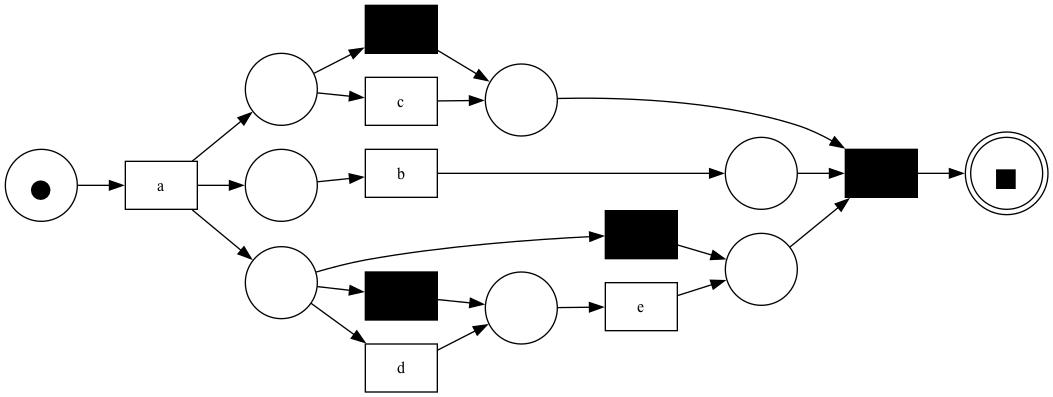

→(a, ∧(b, ↺(𝜏, c, d, e)))


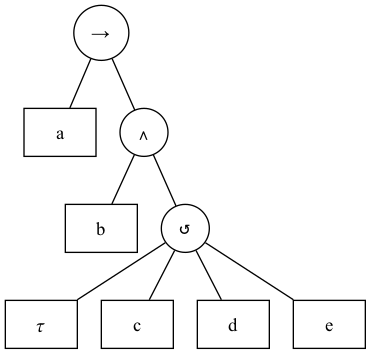

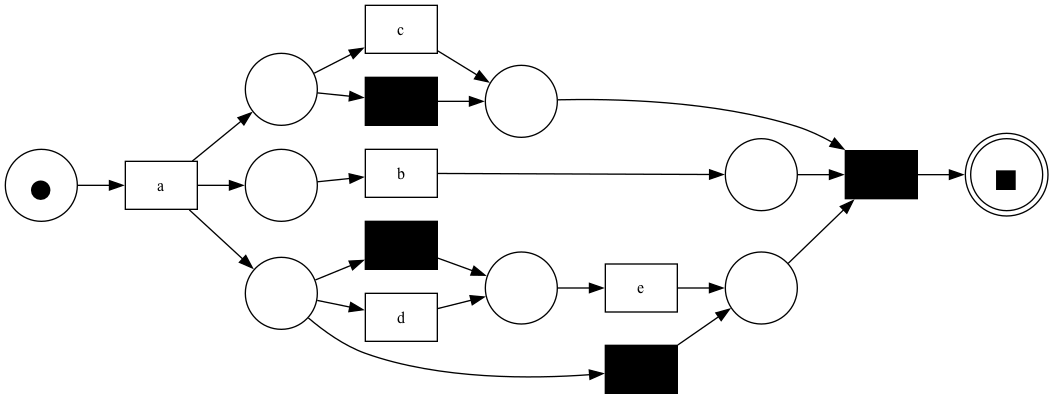

L14


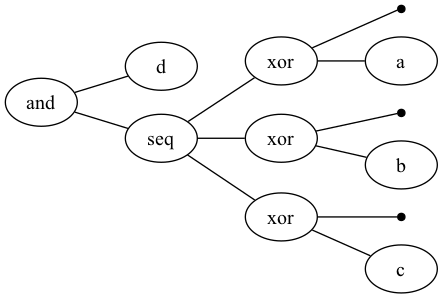

↺(𝜏, a, b, c, d)


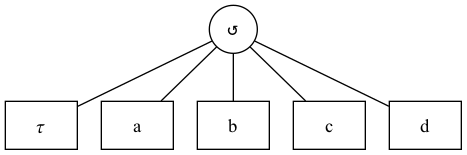

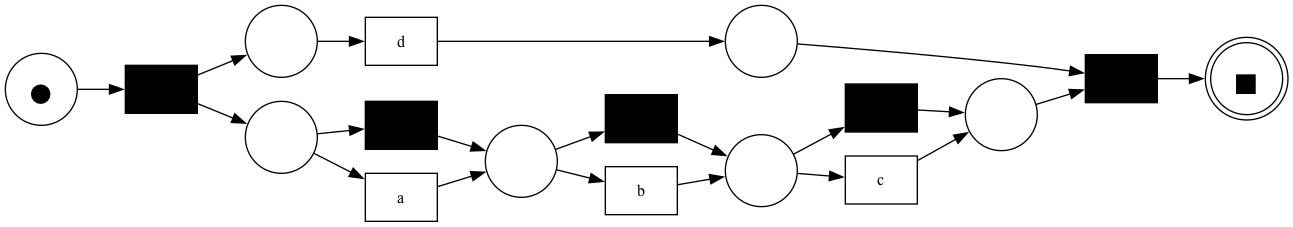

↺(𝜏, a, b, c, d)


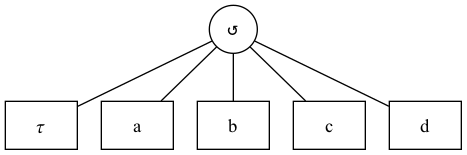

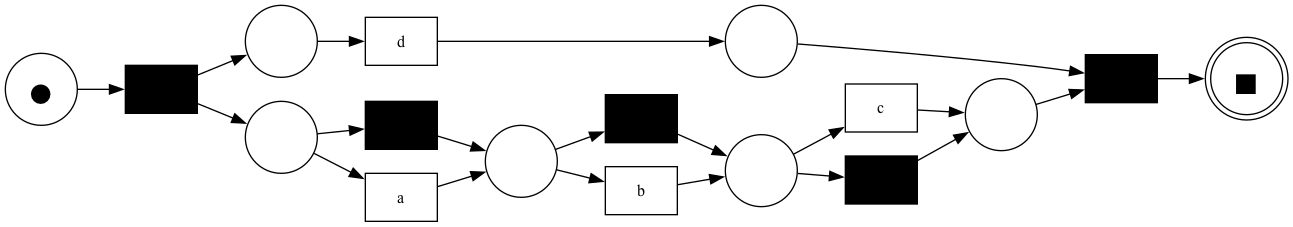

L15


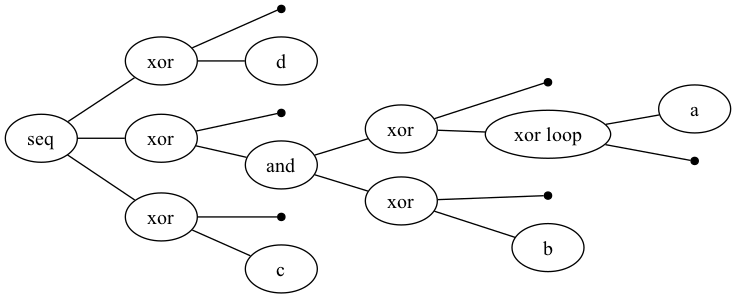

→(×(d, 𝜏), ×(∧(↺(𝜏, a), ×(b, 𝜏)), 𝜏), ×(c, 𝜏))


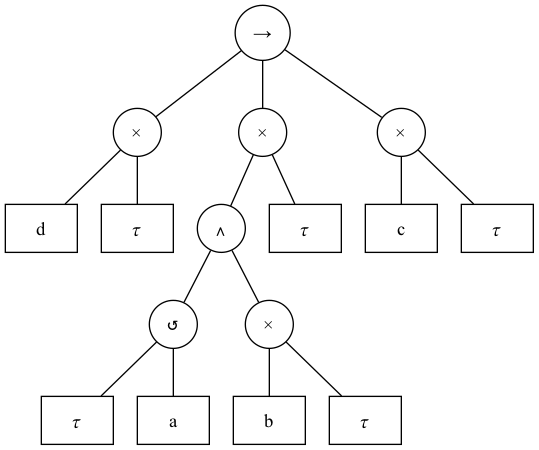

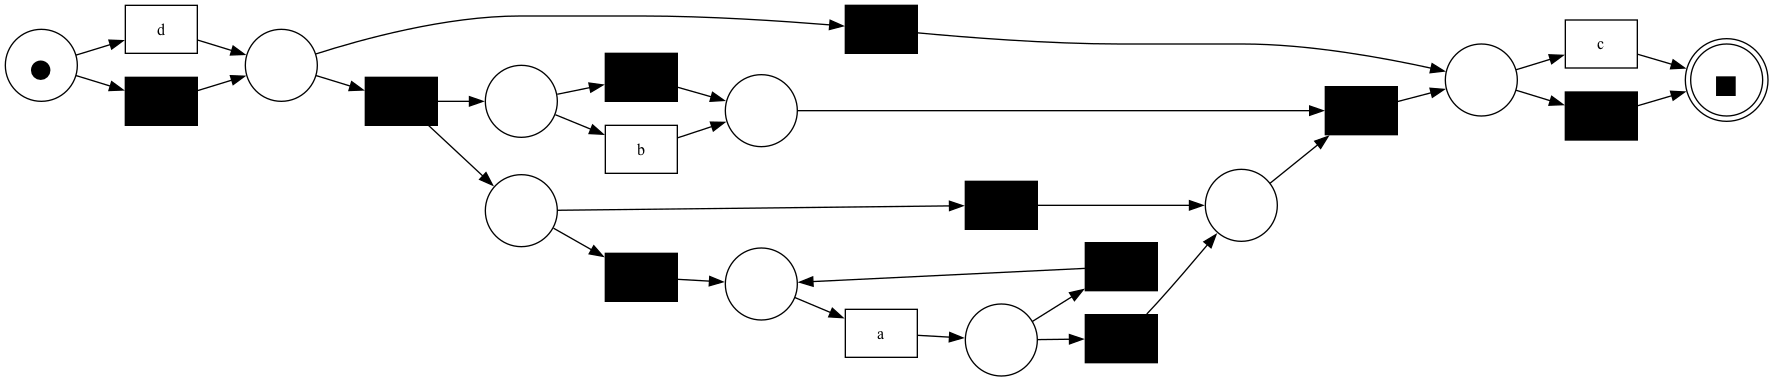

→(×(d, 𝜏), ×(∧(↺(𝜏, a), ×(b, 𝜏)), 𝜏), ×(c, 𝜏))


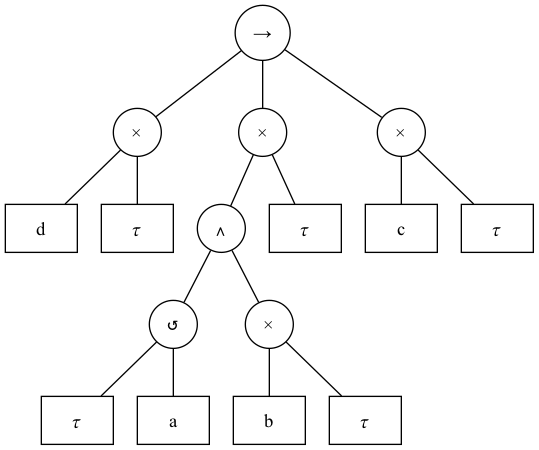

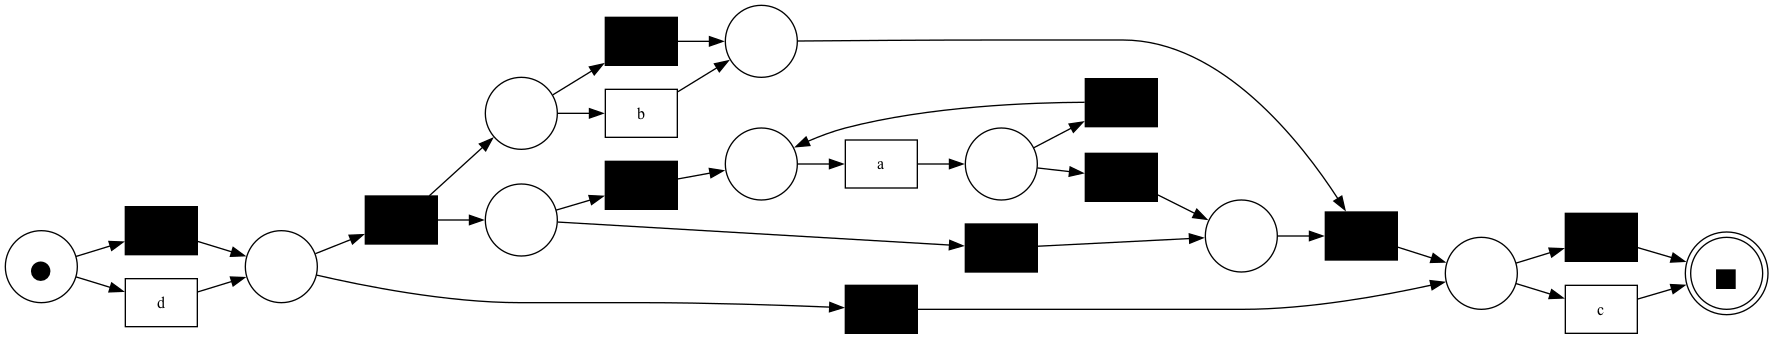

L16


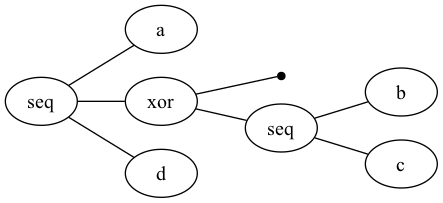

→(a, ×(b, 𝜏), ×(c, 𝜏), d)


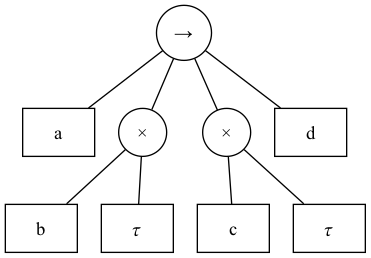

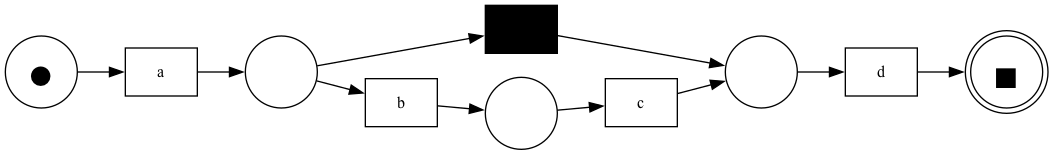

→(a, ×(b, 𝜏), ×(c, 𝜏), d)


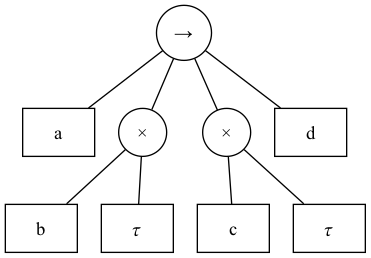

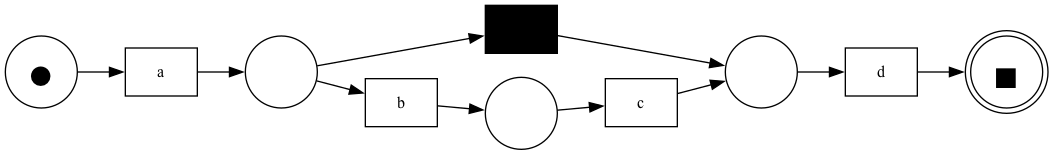

L17


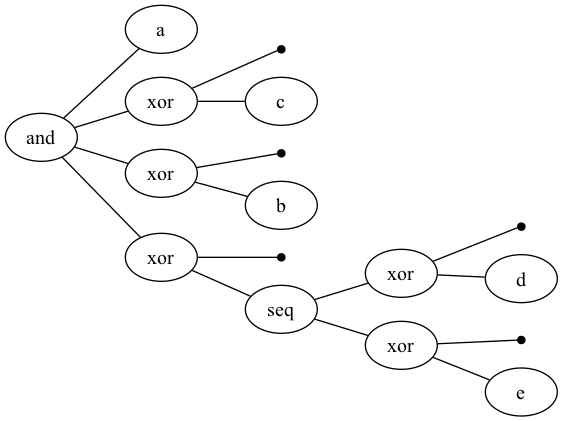

↺(𝜏, a, b, c, d, e)


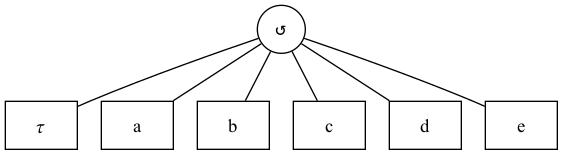

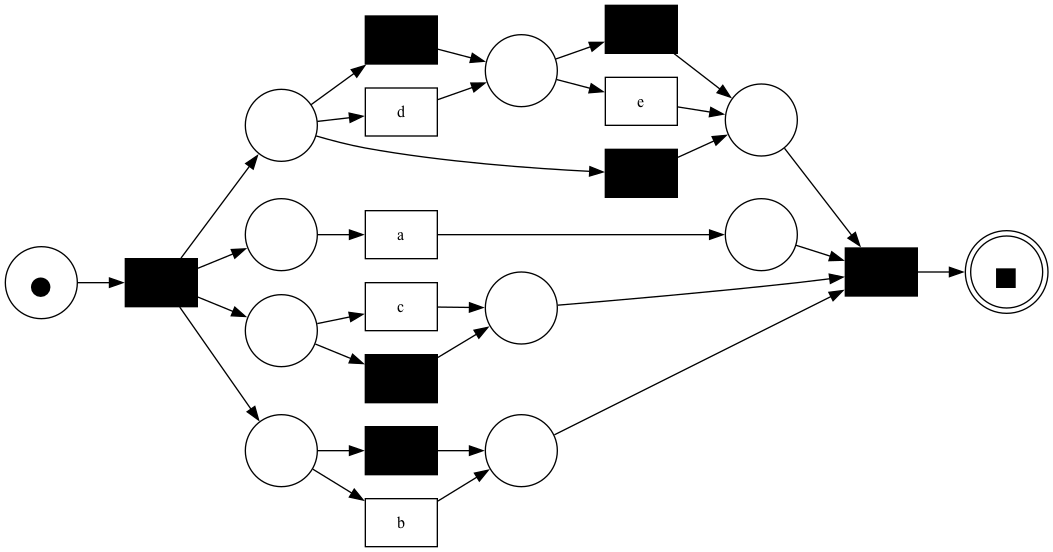

→(a, ∧(×(b, 𝜏), ↺(𝜏, c, d, e)))


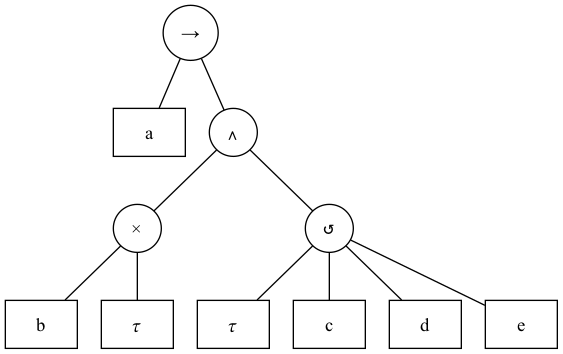

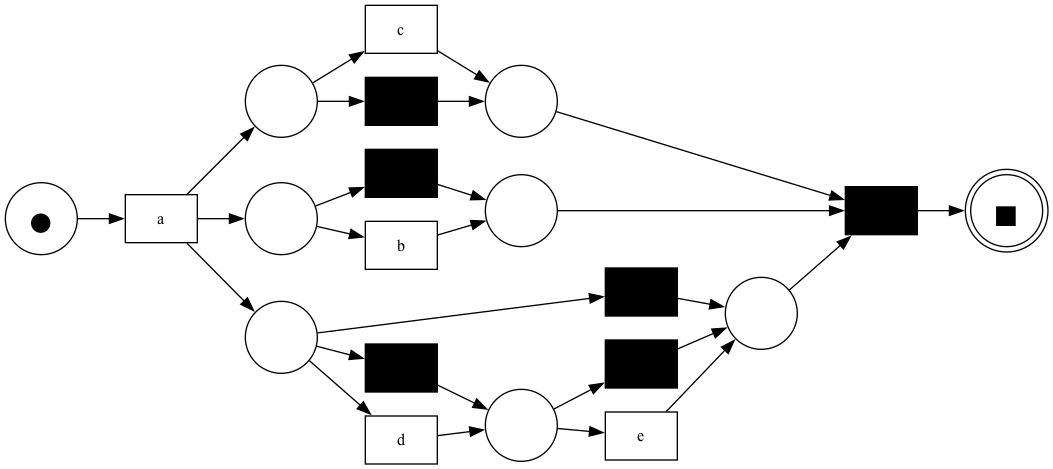

L18


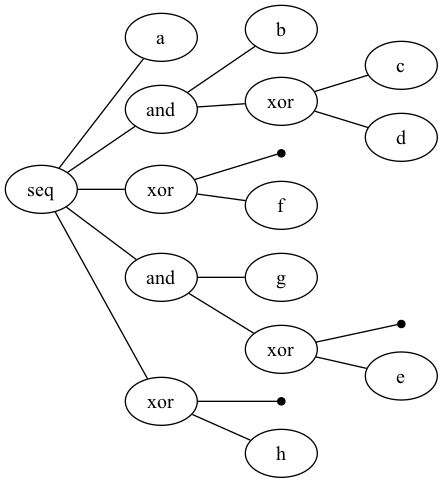

→(a, ∧(b, ×(c, d)), ×(f, 𝜏), ∧(×(e, 𝜏), g), ×(h, 𝜏))


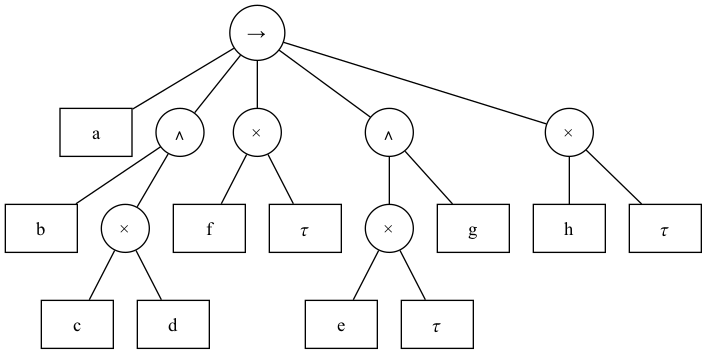

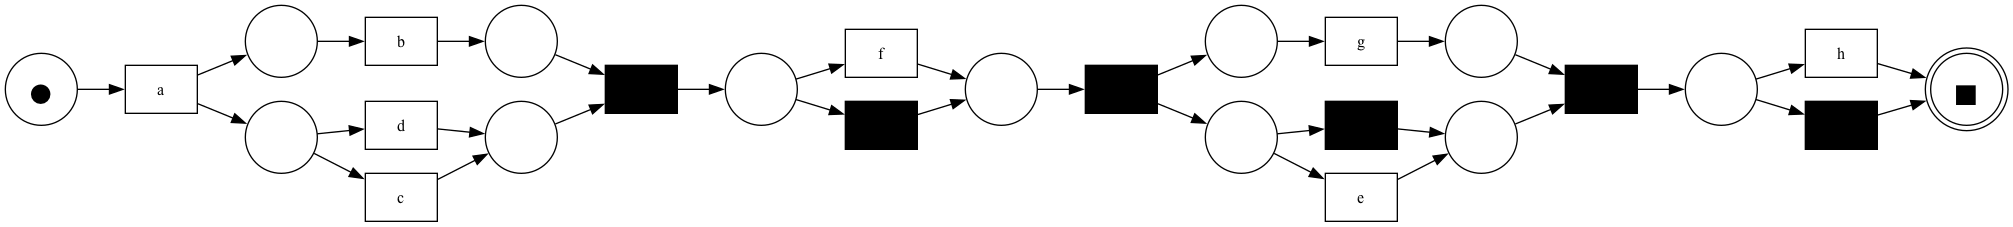

→(a, ∧(b, ×(c, d)), ×(f, 𝜏), ∧(×(e, 𝜏), g), ×(h, 𝜏))


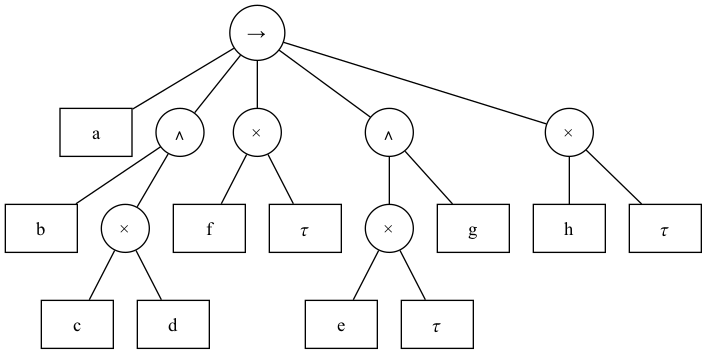

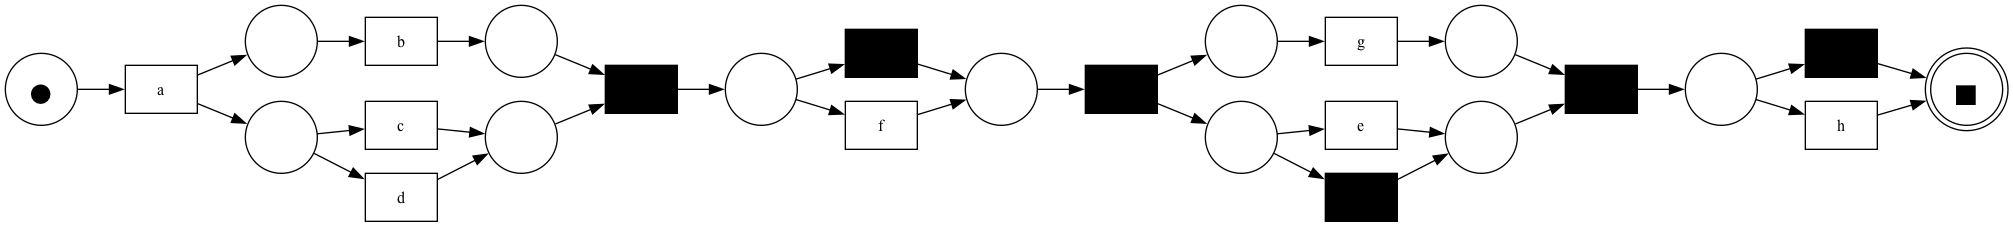

L19


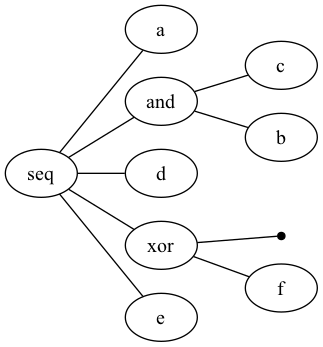

→(a, ∧(b, c), d, ×(f, 𝜏), e)


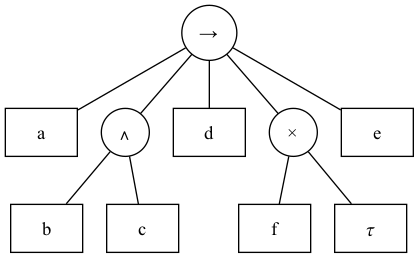

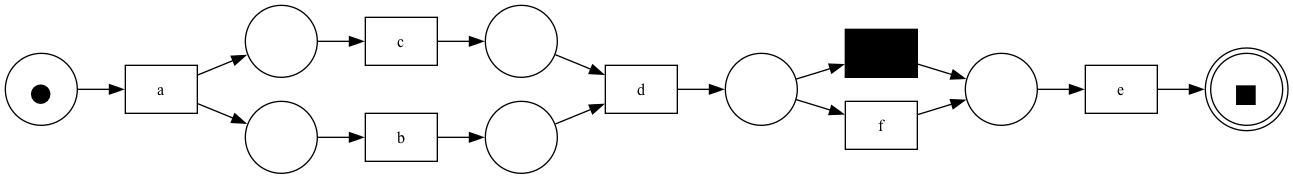

→(a, ∧(b, c), d, ×(f, 𝜏), e)


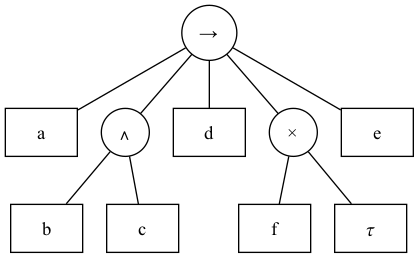

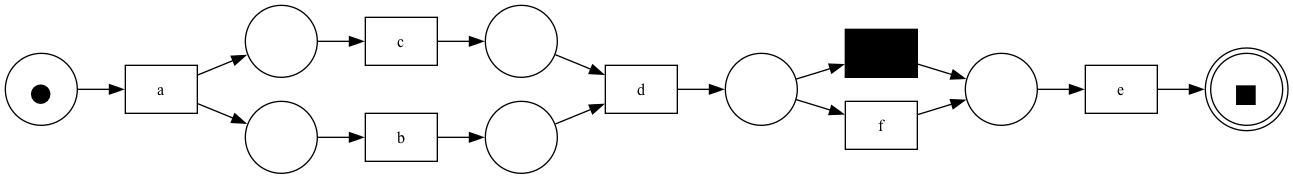

In [183]:
test_logs = read_txt_test_logs("../shared/example_files/simple_event_logs.txt")

for key in test_logs.keys():
    print(key) #test_logs[key])
    run(test_logs[key])
    run_infrequent(test_logs[key])

# Test with real event logs

Polato, Mirko (2017): Dataset belonging to the help desk log of an Italian Company. Version 1. 4TU.ResearchData. dataset. https://doi.org/10.4121/uuid:0c60edf1-6f83-4e75-9367-4c63b3e9d5bb

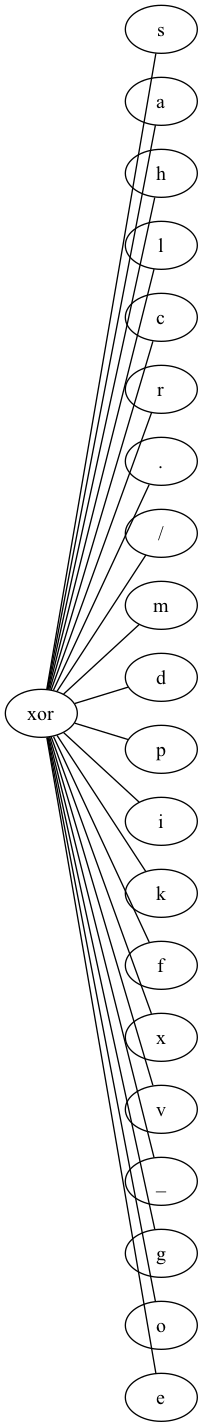

→(×(Insert ticket, 𝜏), ↺(Assign seriousness, Closed, Create SW anomaly, DUPLICATE, Require upgrade, Resolve SW anomaly, Resolve ticket, Schedule intervention, Take in charge ticket, VERIFIED, Wait, →(RESOLVED, INVALID)))


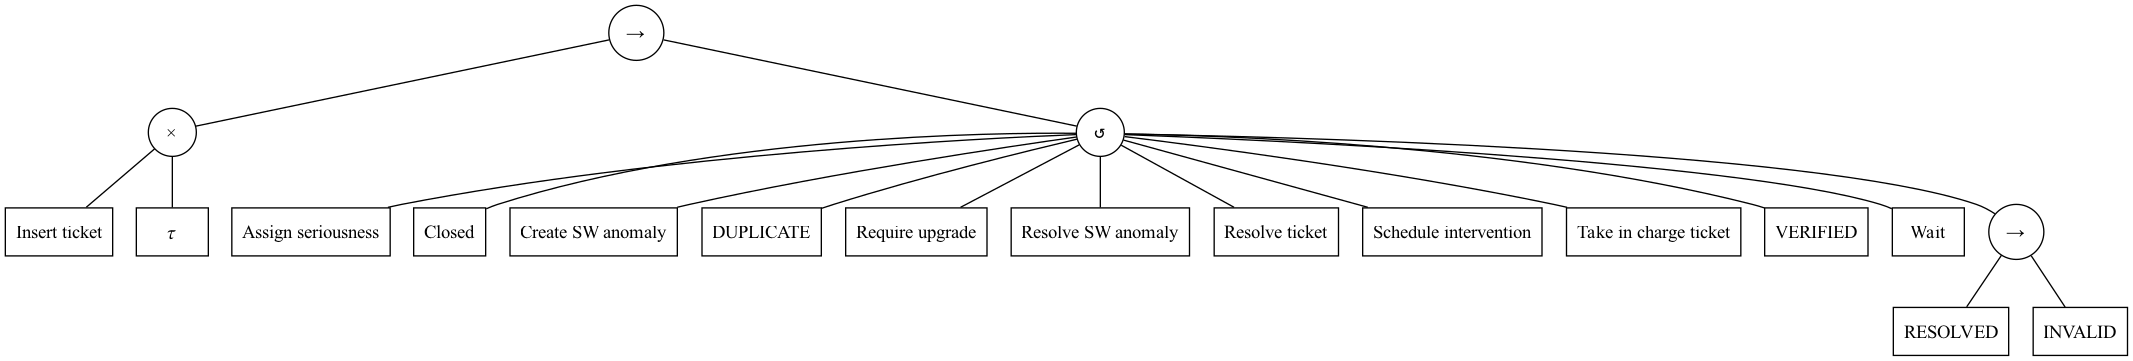

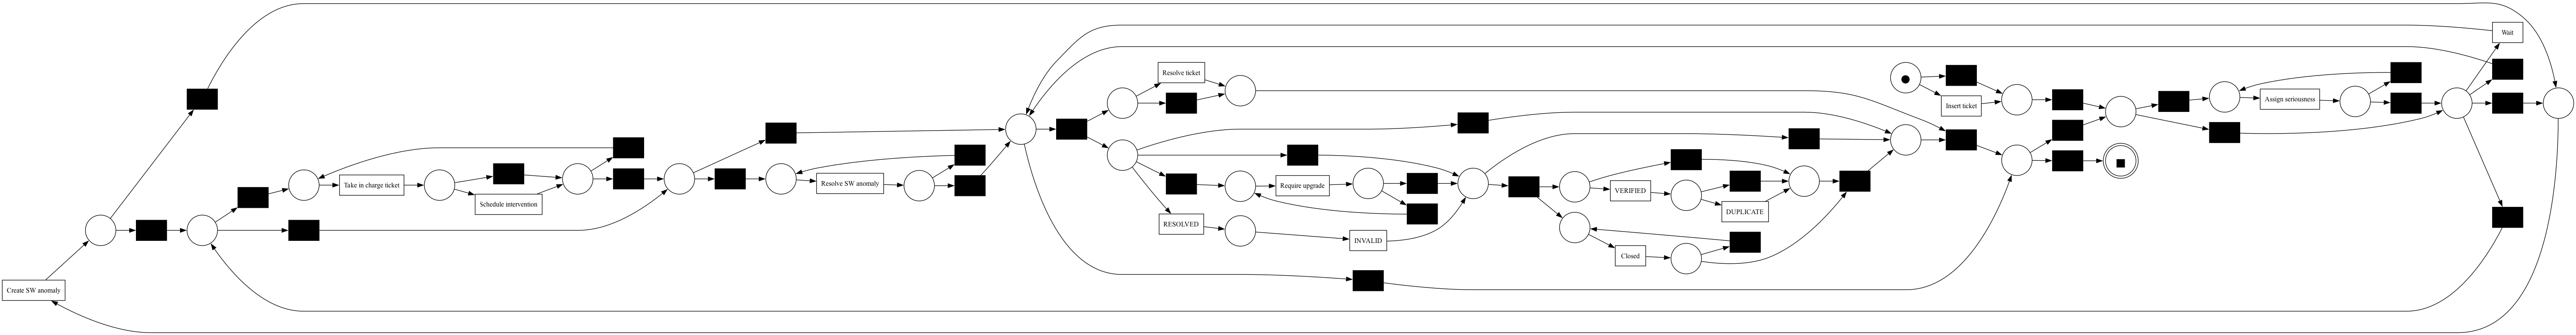

In [186]:
run('../shared/example_files/helpdesk_log.csv')

→(×(Insert ticket, 𝜏), ↺(Assign seriousness, Closed, Create SW anomaly, DUPLICATE, Require upgrade, Resolve SW anomaly, Resolve ticket, Schedule intervention, Take in charge ticket, VERIFIED, Wait, →(RESOLVED, INVALID)))


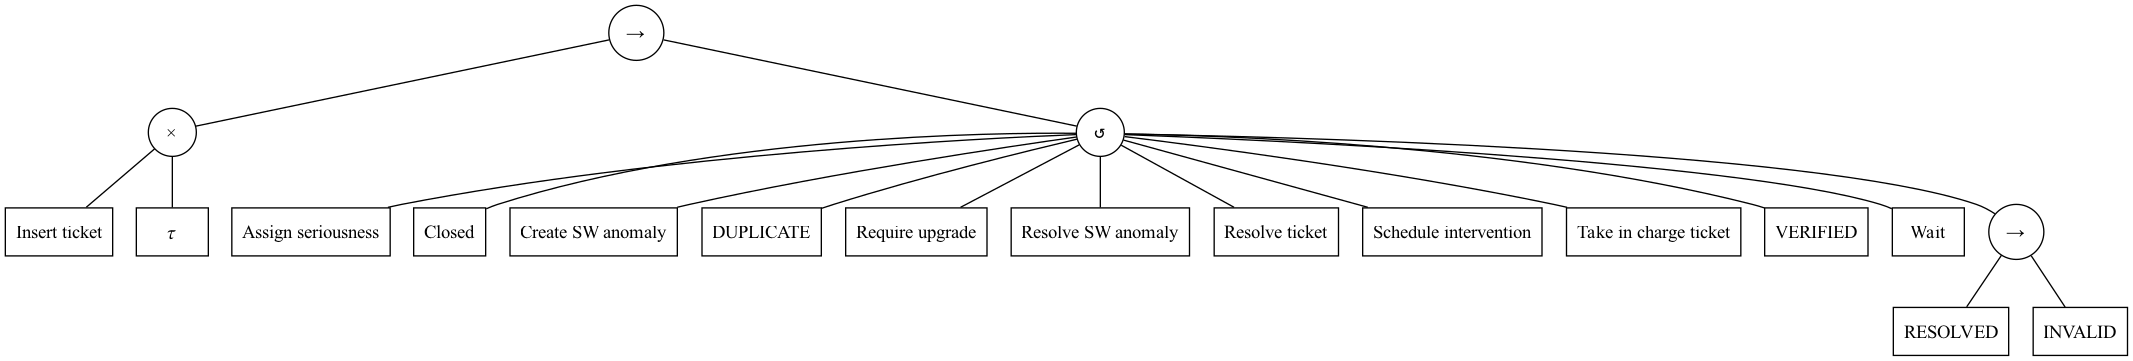

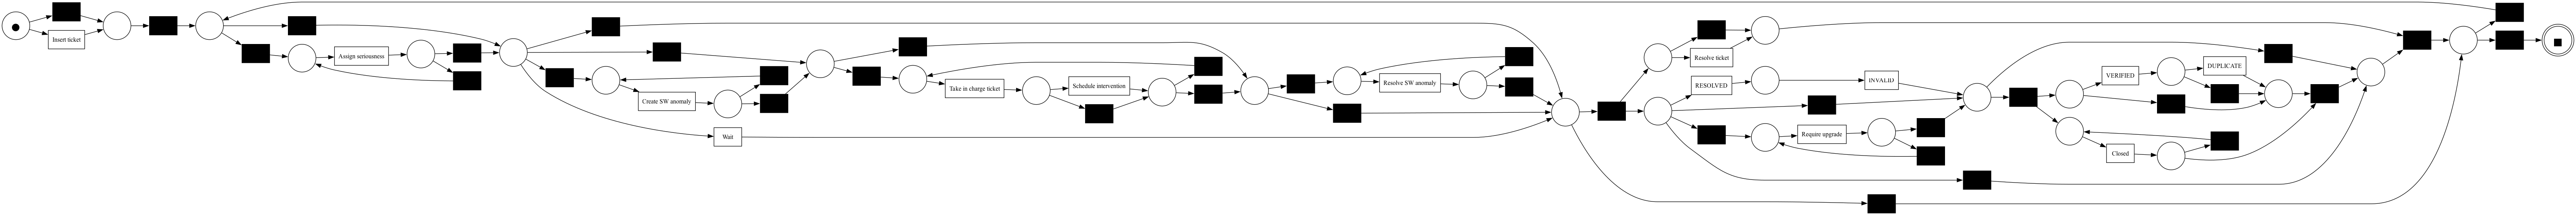

In [189]:
run_infrequent('../shared/example_files/helpdesk_log.csv', 0.9)